# EXPLORATORY DATA ANALYSIS ON A DATASET

### Step 1. Setup – Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Load and View Dataset

In [2]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


### Step 3. Data Cleaning & Preparation

In [3]:
# Check for missing values
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [4]:
# Data types check
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [5]:
# Convert any object columns to numeric (if needed)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
# Handle missing values - Option 1: Drop rows with missing values
df_cleaned = df.dropna()


In [7]:
# Detect outliers using IQR method
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

In [8]:
# Removing outliers
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

### Step 4. Statistical Summary

In [9]:
# Summary statistics
summary = df_cleaned.describe().T

In [10]:
# Add median and IQR
summary['median'] = df_cleaned.median()
summary['IQR'] = summary['75%'] - summary['25%']
summary[['mean', 'std', 'median', 'IQR']]

,mean,std,median,IQR
LB,131.846366,9.453055,133.000000,13.000000
AC,0.004094,0.003752,0.003358,0.006747
FM,0.000602,0.001335,0.000000,0.000310
UC,0.004956,0.002717,0.005051,0.003820
DL,0.001542,0.002216,0.000000,0.003082
DS,0.000000,0.000000,0.000000,0.000000
DP,0.000000,0.000000,0.000000,0.000000
ASTV,42.389054,15.079700,41.000000,27.000000
MSTV,1.271093,0.538078,1.200000,0.700000
ALTV,3.162907,6.031257,0.000000,4.000000


### Step 5. Data Visualization

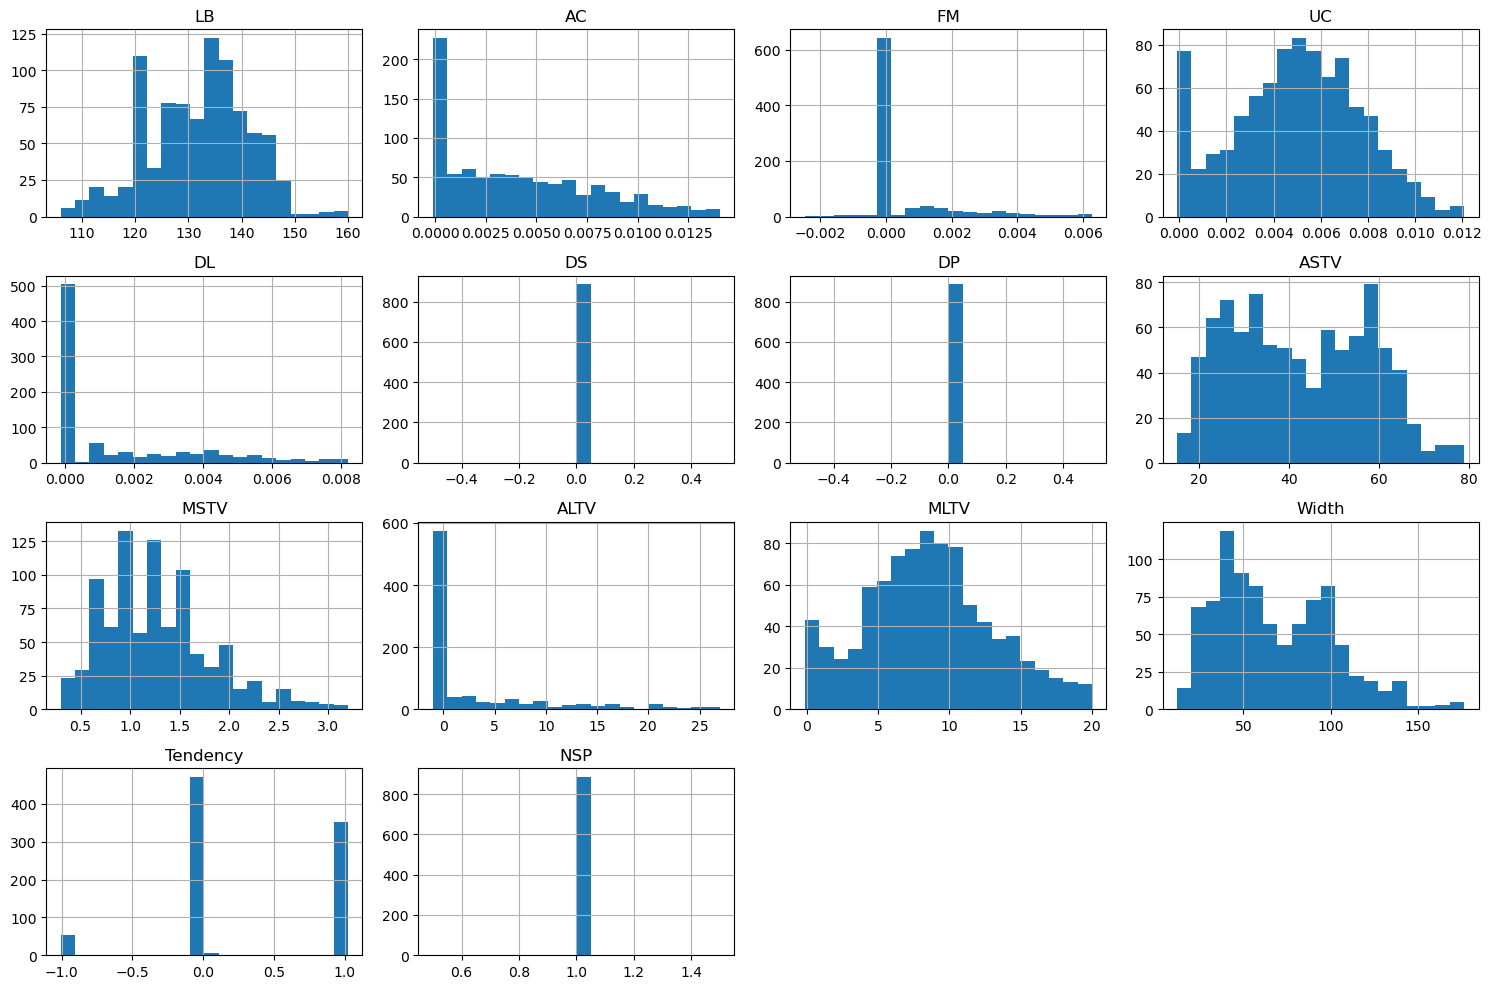

In [11]:
# Histograms
df_cleaned.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

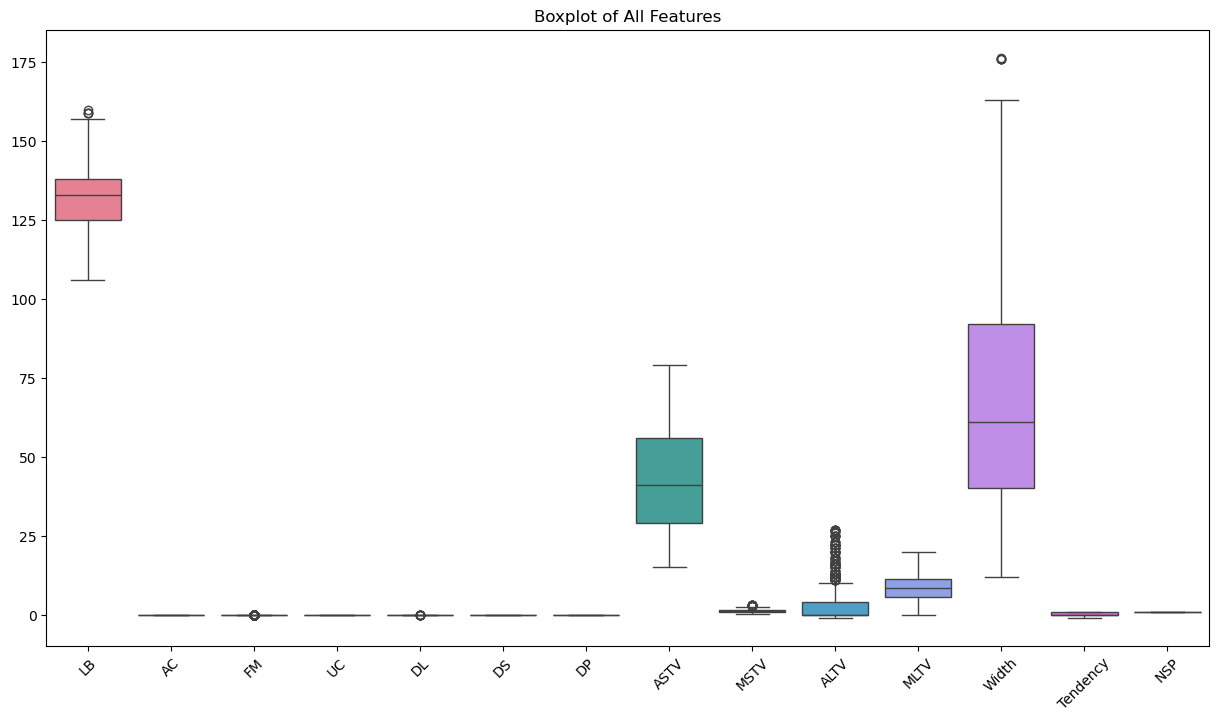

In [12]:
# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Boxplot of All Features")
plt.show()

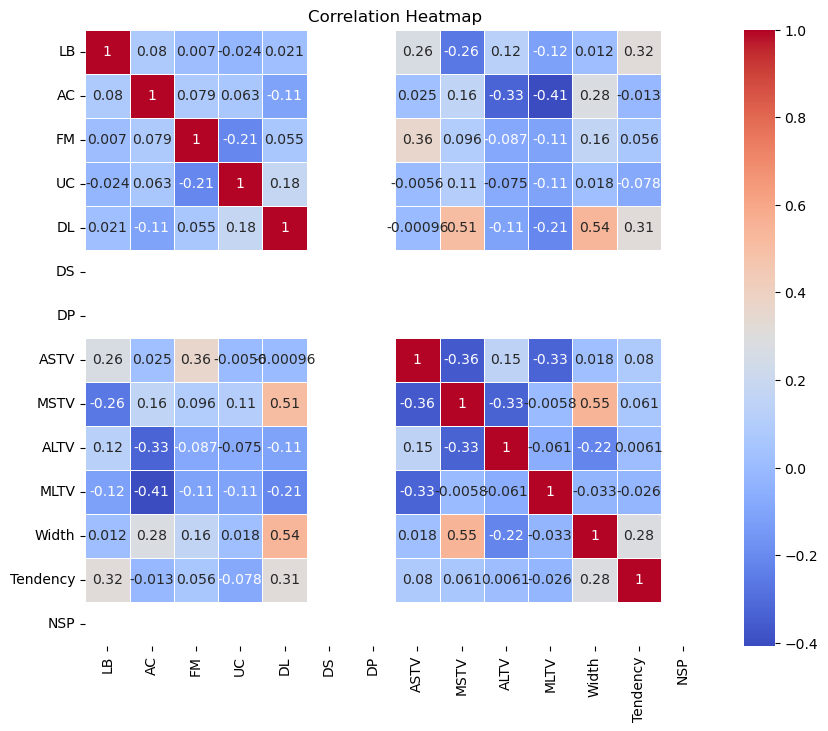

In [13]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

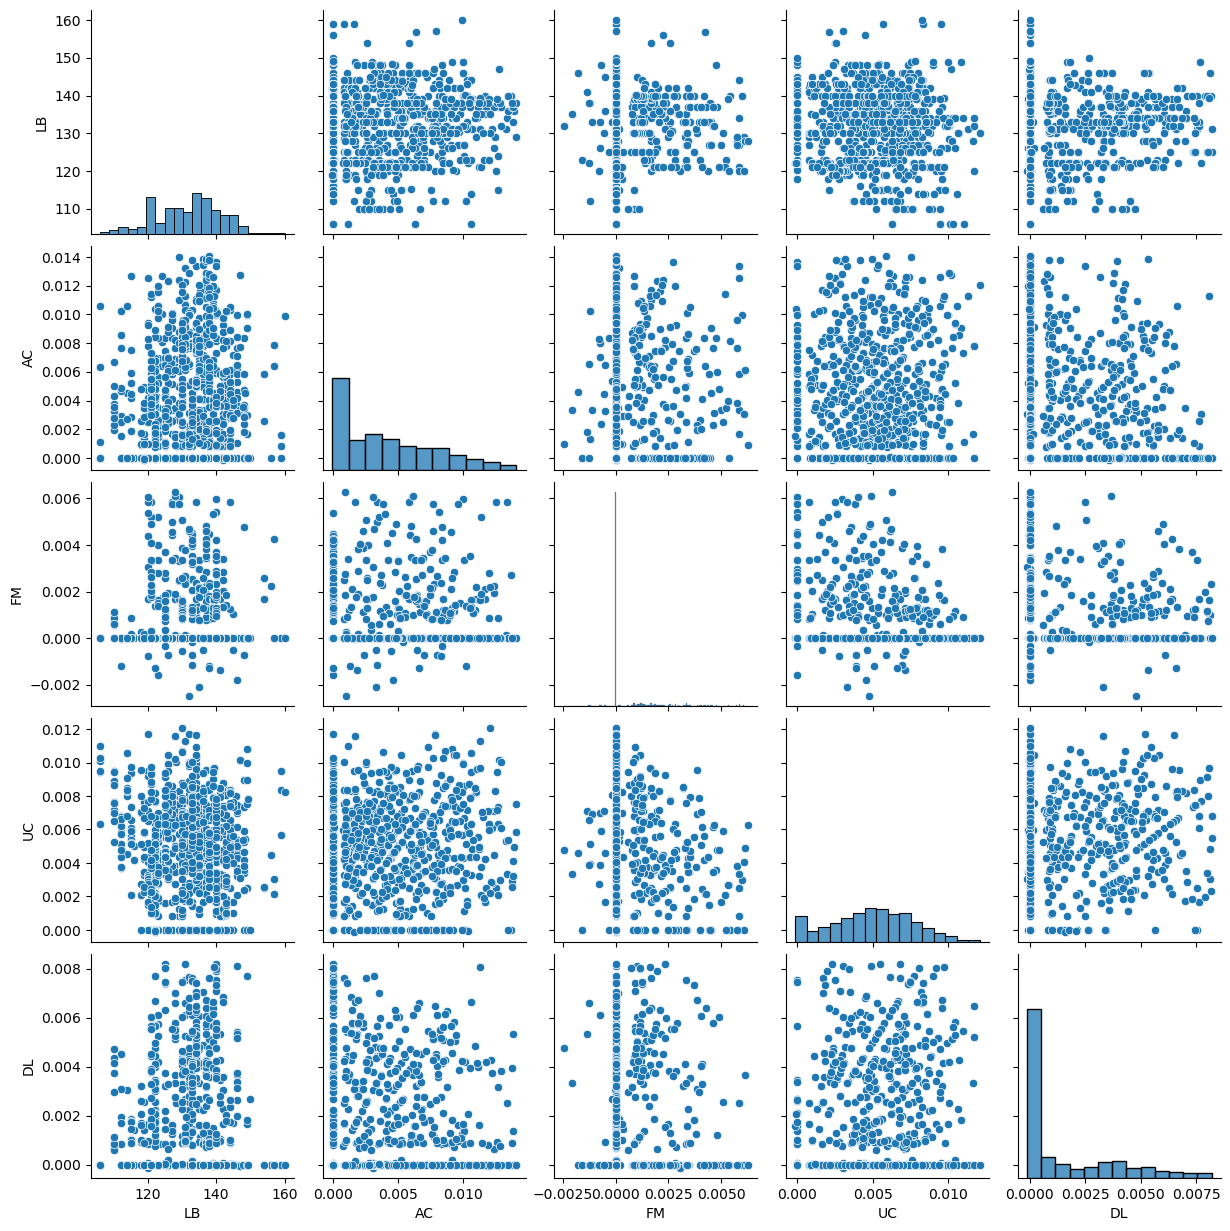

In [14]:
# Pairplot for selected features
sns.pairplot(df_cleaned[['LB', 'AC', 'FM', 'UC', 'DL']])
plt.show()

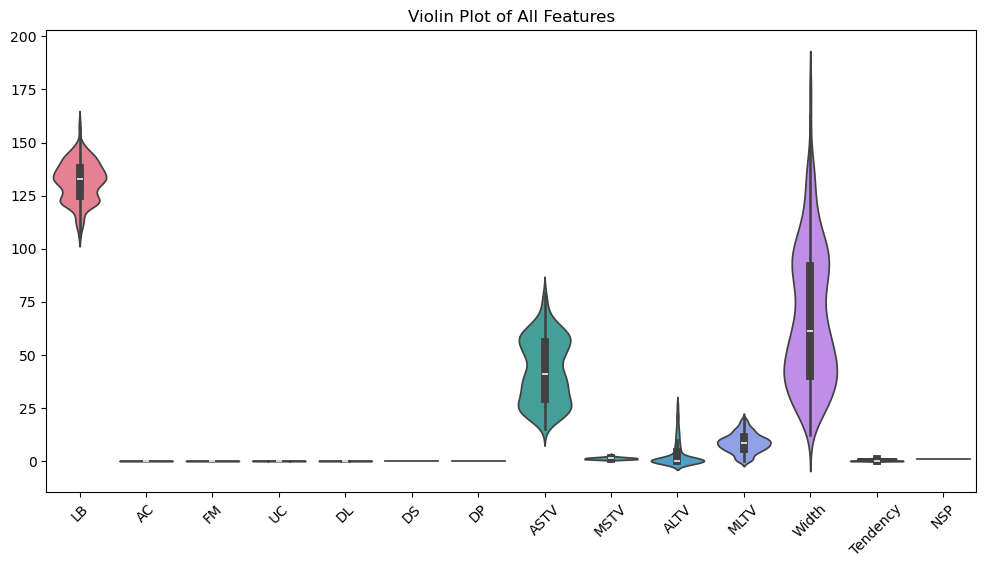

In [18]:
# Violin plot
plt.figure(figsize=(12,6))
sns.violinplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Violin Plot of All Features")
plt.show()

### Step 6. Pattern Recognition and Insights

In [16]:
correlation_matrix = df_cleaned.corr()

In [17]:
# Find strong correlations
strong_corr = correlation_matrix[(correlation_matrix >= 0.7) & (correlation_matrix < 1.0)]
print("Strong correlations:\n", strong_corr.dropna(how='all').dropna(axis=1, how='all'))

Strong correlations:
 Empty DataFrame
Columns: []
Index: []


### Step 7. Conclusion

Exploratory Data Analysis Report: Cardiographic Dataset
Objective:
To analyze fetal cardiographic data for patterns, relationships, and data distributions using EDA techniques.

**1. Data Cleaning & Preparation:**
Loaded the dataset and identified missing values and incorrect data types.
Converted necessary columns to numeric format.
Treated missing values using deletion/imputation techniques.
Removed outliers using the Interquartile Range (IQR) method.

**2. Statistical Summary:**
Calculated key statistical metrics: mean, median, std, IQR for all variables.
Observed:
High variability in ASTV and ALTV, suggesting abnormal variability.
Some variables had skewed distributions (mean ≠ median).

**3. Visual Insights**
Histograms & Boxplots showed the spread of fetal heart rate, accelerations, and variability.
Heatmap revealed correlations:
Strong positive correlation between DL and UC.
Moderate correlation between FM and AC.
Violin Plots highlighted the density of variable distributions.

**4. Patterns & Relationships:**
Higher uterine contractions (UC) tended to align with increased decelerations (DL, DS).
Variability features (ASTV, MSTV, ALTV, MLTV) may indicate fetal health issues when abnormal.

**5. Conclusion:**
The dataset revealed meaningful patterns in fetal heart rate activity.
Several features showed strong relationships that can aid in predicting fetal well-being.
Further work can include predictive modeling or clustering based on these variables for real-time fetal health monitoring.

